In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
%matplotlib inline
warnings.filterwarnings(action='ignore') 

from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('C:/Users/Swalllow1219/Desktop/Kaggle_Practice/Data/titanic_train.csv')
df_raw = df.copy()

In [3]:
# Create table for missing data analysis
def draw_missing_data_table(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [4]:
# Plot learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Validation score")

    plt.legend(loc="best")
    return plt

In [5]:
# Plot validation curve
def plot_validation_curve(estimator, title, X, y, param_name, param_range, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    train_scores, test_scores = validation_curve(estimator, X, y, param_name, param_range, cv)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.plot(param_range, train_mean, color='r', marker='o', markersize=5, label='Training score')
    plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='r')
    plt.plot(param_range, test_mean, color='g', linestyle='--', marker='s', markersize=5, label='Validation score')
    plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='g')
    plt.grid() 
    plt.xscale('log')
    plt.legend(loc='best') 
    plt.xlabel('Parameter') 
    plt.ylabel('Score') 
    plt.ylim(ylim)

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df.shape

(891, 12)

In [10]:
df['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [11]:
df.drop('Cabin', axis=1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [12]:
df['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [13]:
val = 1000
df['Age'].fillna(1000, inplace=True)
df['Age'].max()

1000.0

In [14]:
df.drop(df[pd.isnull(df['Embarked'])].index, inplace=True)
df[pd.isnull(df['Embarked'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


In [15]:
df.shape

(889, 11)

In [16]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [17]:
df.drop('PassengerId', axis=1, inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [18]:
df['Sex'] = pd.Categorical(df['Sex'])
df['Embarked'] = pd.Categorical(df['Embarked'])

In [19]:
df['FamilySize'] = df['SibSp'] + df['Parch']
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [20]:
df.drop('SibSp',axis=1,inplace=True)
df.drop('Parch',axis=1,inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,FamilySize
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,0


In [21]:
df.drop('Name', axis=1, inplace=True)
df.drop('Ticket', axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0


In [22]:
df.dtypes

Survived         int64
Pclass           int64
Sex           category
Age            float64
Fare           float64
Embarked      category
FamilySize       int64
dtype: object

In [23]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,Survived,Pclass,Age,Fare,FamilySize,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,7.2500,1,1,0,1
1,1,1,38.0,71.2833,1,0,0,0
2,1,3,26.0,7.9250,0,0,0,1
3,1,1,35.0,53.1000,1,0,0,1
4,0,3,35.0,8.0500,0,1,0,1


In [24]:
df.columns

Index(['Survived', 'Pclass', 'Age', 'Fare', 'FamilySize', 'Sex_male',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [25]:
X = df[df.loc[:, df.columns != 'Survived'].columns]
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [26]:
X_train.shape

(711, 7)

In [27]:
y_train.shape

(711,)

In [28]:
# Logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [29]:
scores = cross_val_score(logreg, X_train, y_train, cv=10)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.782 +/- 0.034


<module 'matplotlib.pyplot' from 'C:\\Users\\Swalllow1219\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

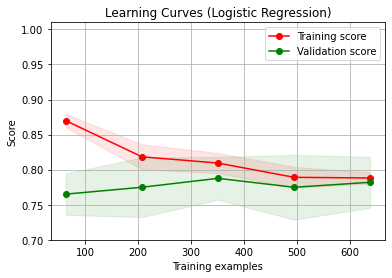

In [30]:
title = "Learning Curves (Logistic Regression)"
cv = 10
plot_learning_curve(logreg, title, X_train, y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=1)

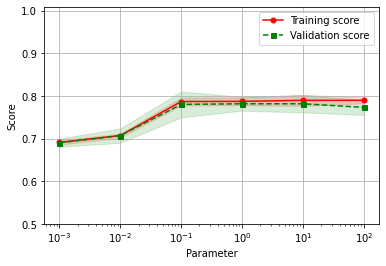

In [31]:
title = 'Validation Curve (Logistic Regression)'
param_name = 'C'
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
cv = 10
plot_validation_curve(estimator=logreg, title=title, X=X_train, y=y_train, param_name=param_name,
                      ylim=(0.5, 1.01), param_range=param_range)

In [32]:
df = df_raw.copy()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
df['FamilySize'] = df['SibSp'] + df['Parch']
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [34]:
df.drop('SibSp',axis=1,inplace=True)
df.drop('Parch',axis=1,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0


In [35]:
df.drop(['Name','Ticket','Cabin'], axis=1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,1,0,3,male,22.0,7.2500,S,1
1,2,1,1,female,38.0,71.2833,C,1
2,3,1,3,female,26.0,7.9250,S,0
3,4,1,1,female,35.0,53.1000,S,1
4,5,0,3,male,35.0,8.0500,S,0


In [36]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
Fare           float64
Embarked        object
FamilySize       int64
dtype: object

In [37]:
df_raw['Name'].unique()[:10]

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)'], dtype=object)

In [38]:
# Regular Expressions
df['Title']=0
for i in df:
    df['Title']=df_raw['Name'].str.extract('([A-Za-z]+)\.', expand=False)  

df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Title
0,1,0,3,male,22.0,7.2500,S,1,Mr
1,2,1,1,female,38.0,71.2833,C,1,Mrs
2,3,1,3,female,26.0,7.9250,S,0,Miss
3,4,1,1,female,35.0,53.1000,S,1,Mrs
4,5,0,3,male,35.0,8.0500,S,0,Mr


In [39]:
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

<AxesSubplot:xlabel='Title', ylabel='Age'>

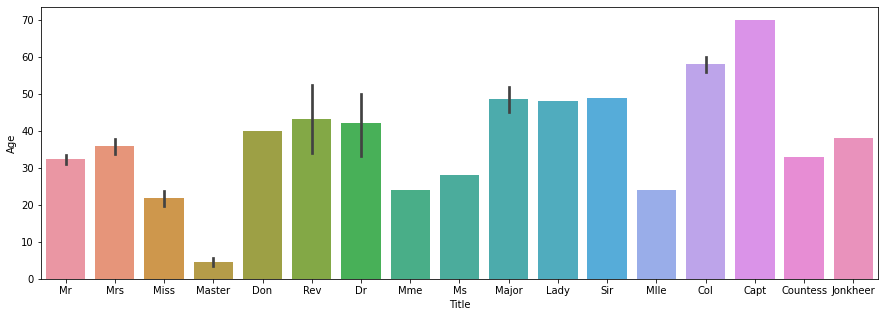

In [40]:
plt.figure(figsize=(15,5))
sns.barplot(x=df['Title'], y=df_raw['Age'])

In [41]:
df_raw['Title'] = df['Title']
means = df_raw.groupby('Title')['Age'].mean()
means.head()

Title
Capt        70.0
Col         58.0
Countess    33.0
Don         40.0
Dr          42.0
Name: Age, dtype: float64

In [42]:
map_means = means.to_dict()
map_means

{'Capt': 70.0,
 'Col': 58.0,
 'Countess': 33.0,
 'Don': 40.0,
 'Dr': 42.0,
 'Jonkheer': 38.0,
 'Lady': 48.0,
 'Major': 48.5,
 'Master': 4.574166666666667,
 'Miss': 21.773972602739725,
 'Mlle': 24.0,
 'Mme': 24.0,
 'Mr': 32.368090452261306,
 'Mrs': 35.898148148148145,
 'Ms': 28.0,
 'Rev': 43.166666666666664,
 'Sir': 49.0}

In [43]:
idx_nan_age = df.loc[np.isnan(df['Age'])].index
idx_nan_age

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [44]:
df['Age'].head(20)

0     22.0
1     38.0
2     26.0
3     35.0
4     35.0
5      NaN
6     54.0
7      2.0
8     27.0
9     14.0
10     4.0
11    58.0
12    20.0
13    39.0
14    14.0
15    55.0
16     2.0
17     NaN
18    31.0
19     NaN
Name: Age, dtype: float64

In [45]:
df.loc[idx_nan_age,'Age'].loc[idx_nan_age] = df['Title'].loc[idx_nan_age].map(map_means)
df['Age'].head(20)

0     22.0
1     38.0
2     26.0
3     35.0
4     35.0
5      NaN
6     54.0
7      2.0
8     27.0
9     14.0
10     4.0
11    58.0
12    20.0
13    39.0
14    14.0
15    55.0
16     2.0
17     NaN
18    31.0
19     NaN
Name: Age, dtype: float64

In [46]:
df['Imputed'] = 0
df.at[idx_nan_age.values, 'Imputed'] = 1
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Title,Imputed
0,1,0,3,male,22.0,7.2500,S,1,Mr,0
1,2,1,1,female,38.0,71.2833,C,1,Mrs,0
2,3,1,3,female,26.0,7.9250,S,0,Miss,0
3,4,1,1,female,35.0,53.1000,S,1,Mrs,0
4,5,0,3,male,35.0,8.0500,S,0,Mr,0


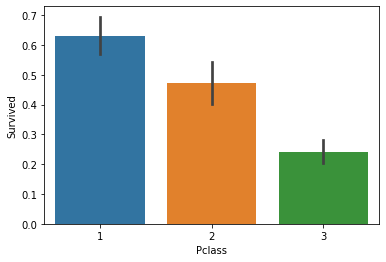

In [47]:
sns.barplot(df['Pclass'], df['Survived']);

In [48]:
df.groupby(['Title'])['PassengerId'].count()

Title
Capt          1
Col           2
Countess      1
Don           1
Dr            7
Jonkheer      1
Lady          1
Major         2
Master       40
Miss        182
Mlle          2
Mme           1
Mr          517
Mrs         125
Ms            1
Rev           6
Sir           1
Name: PassengerId, dtype: int64

In [49]:
titles_dict = {'Capt': 'Other',
               'Major': 'Other',
               'Jonkheer': 'Other',
               'Don': 'Other',
               'Sir': 'Other',
               'Dr': 'Other',
               'Rev': 'Other',
               'Countess': 'Other',
               'Dona': 'Other',
               'Mme': 'Mrs',
               'Mlle': 'Miss',
               'Ms': 'Miss',
               'Mr': 'Mr',
               'Mrs': 'Mrs',
               'Miss': 'Miss',
               'Master': 'Master',
               'Lady': 'Other'}

In [50]:
df['Title'] = df['Title'].map(titles_dict)
df['Title'].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

In [51]:
df['Title'] = pd.Categorical(df['Title'])
df.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Sex              object
Age             float64
Fare            float64
Embarked         object
FamilySize        int64
Title          category
Imputed           int64
dtype: object

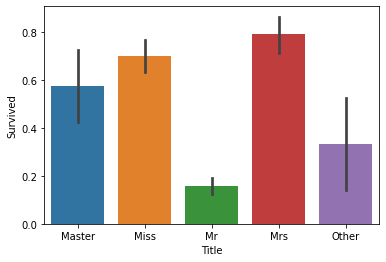

In [52]:
sns.barplot(x='Title', y='Survived', data=df);

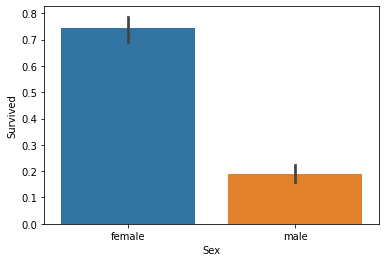

In [53]:
df['Sex'] = pd.Categorical(df['Sex'])
sns.barplot(df['Sex'],df['Survived']);

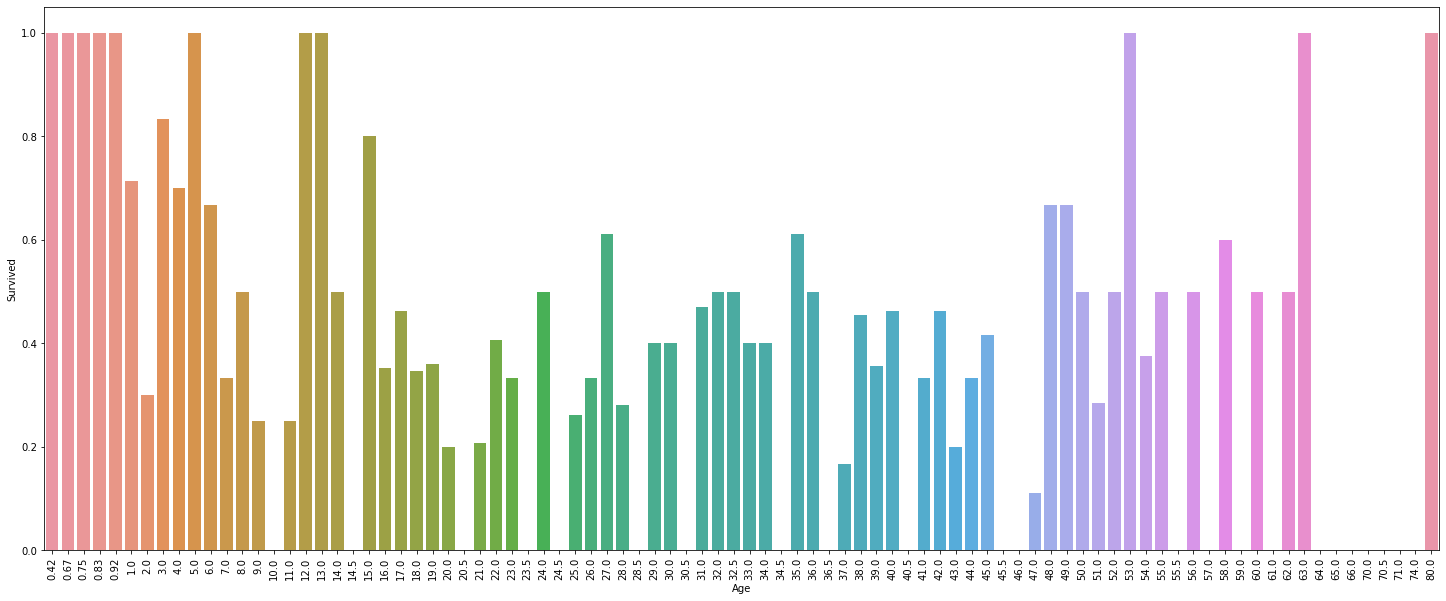

In [54]:
plt.figure(figsize=(25,10))
sns.barplot(df['Age'],df['Survived'], ci=None)
plt.xticks(rotation=90);

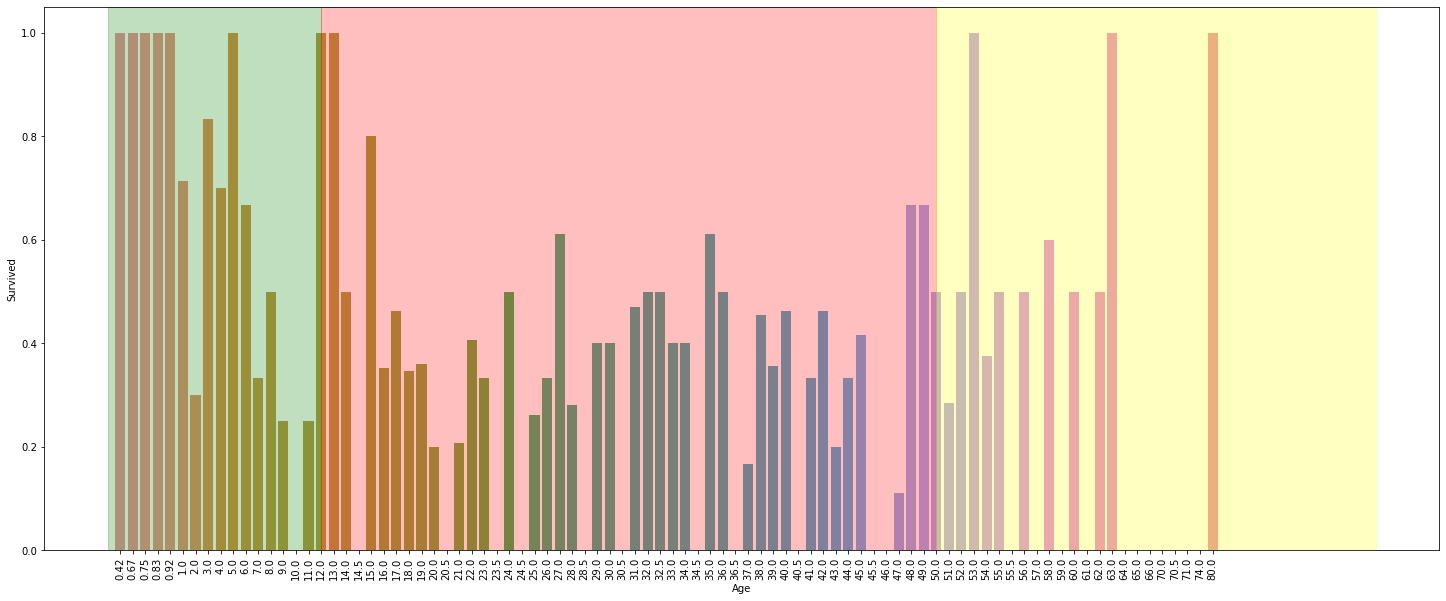

In [55]:
limit_1 = 12
limit_2 = 50

x_limit_1 = np.size(df[df['Age'] < limit_1]['Age'].unique())
x_limit_2 = np.size(df[df['Age'] < limit_2]['Age'].unique())

plt.figure(figsize=(25,10))
sns.barplot(df['Age'],df['Survived'], ci=None)

plt.axvspan(-1, x_limit_1, alpha=0.25, color='green')
plt.axvspan(x_limit_1, x_limit_2, alpha=0.25, color='red')
plt.axvspan(x_limit_2, 100, alpha=0.25, color='yellow')

plt.xticks(rotation=90);

In [56]:
df['Age'] = pd.cut(df['Age'], bins=[0, 12, 50, 200], labels=['Child','Adult','Elder'])
df['Age'].head()

0    Adult
1    Adult
2    Adult
3    Adult
4    Adult
Name: Age, dtype: category
Categories (3, object): ['Child' < 'Adult' < 'Elder']

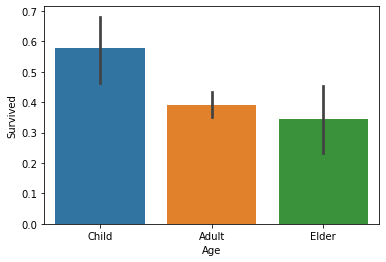

In [57]:
sns.barplot(df['Age'], df['Survived']);

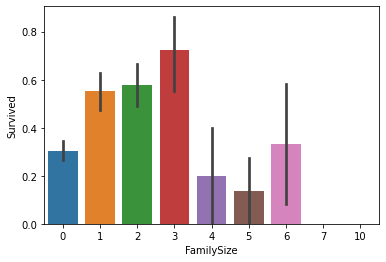

In [58]:
sns.barplot(df['FamilySize'], df['Survived']);

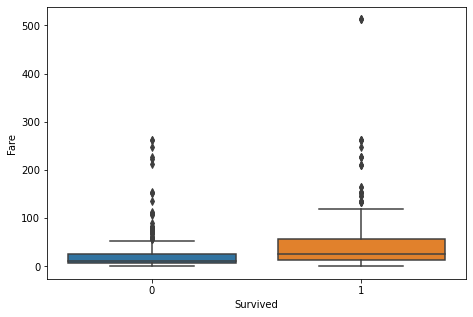

In [59]:
plt.figure(figsize=(7.5,5))
sns.boxplot(df['Survived'], df['Fare']);

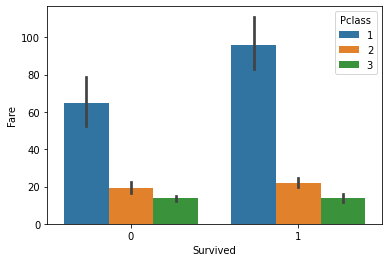

In [60]:
sns.barplot(x=df['Survived'], y=df['Fare'], hue = df['Pclass']);

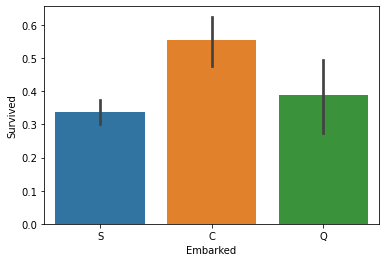

In [61]:
sns.barplot(df['Embarked'], df['Survived']);

In [62]:
df.groupby(['Embarked']).mean()

,PassengerId,Survived,Pclass,Fare,FamilySize,Imputed
Embarked,,,,,,
C,445.357143,0.553571,1.886905,59.954144,0.750000,0.226190
Q,417.896104,0.389610,2.909091,13.276030,0.597403,0.636364
S,449.527950,0.336957,2.350932,27.079812,0.984472,0.139752


In [63]:
df.groupby(['Embarked','Age'])['PassengerId'].count()

Embarked  Age  
C         Child     11
          Adult    104
          Elder     15
Q         Child      4
          Adult     21
          Elder      3
S         Child     54
          Adult    455
          Elder     45
Name: PassengerId, dtype: int64

In [64]:
df.groupby(['Embarked','Sex'])['PassengerId'].count()

Embarked  Sex   
C         female     73
          male       95
Q         female     36
          male       41
S         female    203
          male      441
Name: PassengerId, dtype: int64

In [65]:
df.groupby(['Sex', 'Age'])['PassengerId'].count()

Sex     Age  
female  Child     32
        Adult    212
        Elder     17
male    Child     37
        Adult    369
        Elder     47
Name: PassengerId, dtype: int64

In [66]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Title,Imputed
0,1,0,3,male,Adult,7.2500,S,1,Mr,0
1,2,1,1,female,Adult,71.2833,C,1,Mrs,0
2,3,1,3,female,Adult,7.9250,S,0,Miss,0
3,4,1,1,female,Adult,53.1000,S,1,Mrs,0
4,5,0,3,male,Adult,8.0500,S,0,Mr,0


In [67]:
df.drop('PassengerId', axis=1, inplace=True)

In [68]:
df.dtypes

Survived         int64
Pclass           int64
Sex           category
Age           category
Fare           float64
Embarked        object
FamilySize       int64
Title         category
Imputed          int64
dtype: object

In [69]:
df['Embarked'] = pd.Categorical(df['Embarked'])
df['Pclass'] = pd.Categorical(df['Pclass'])
df.dtypes

Survived         int64
Pclass        category
Sex           category
Age           category
Fare           float64
Embarked      category
FamilySize       int64
Title         category
Imputed          int64
dtype: object

In [70]:
df = pd.get_dummies(df, drop_first=1)  
df.head()

,Survived,Fare,FamilySize,Imputed,Pclass_2,Pclass_3,Sex_male,Age_Adult,Age_Elder,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,0,7.2500,1,0,0,1,1,1,0,0,1,0,1,0,0
1,1,71.2833,1,0,0,0,0,1,0,0,0,0,0,1,0
2,1,7.9250,0,0,0,1,0,1,0,0,1,1,0,0,0
3,1,53.1000,1,0,0,0,0,1,0,0,1,0,0,1,0
4,0,8.0500,0,0,0,1,1,1,0,0,1,0,1,0,0


In [71]:
from sklearn.model_selection import train_test_split

X = df[df.loc[:, df.columns != 'Survived'].columns]
y=  df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=22)

In [72]:
from scipy.stats import boxcox

X_train_transformed = X_train.copy()
X_train_transformed['Fare'] = boxcox(X_train_transformed['Fare']+1)[0]
X_test_transformed = X_test.copy()
X_test_transformed['Fare'] = boxcox(X_test_transformed['Fare']+1)[0]

In [73]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_transformed_scaled = scaler.fit_transform(X_train_transformed)
X_test_transformed_scaled = scaler.fit_transform(X_test_transformed)

In [74]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2).fit(X_train_transformed)
X_train_poly = poly.transform(X_train_transformed_scaled)
X_test_poly = poly.transform(X_test_transformed_scaled)

In [75]:
print(poly.get_feature_names())

['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x0 x13', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x1 x13', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x2 x13', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x3 x13', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x4 x13', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x5 x13', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x6 x13', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x7 x13', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x8 x13', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x9 x13', 'x10^2', 'x10 x11', '

In [76]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

logreg = LogisticRegression(C=1)
logreg.fit(X_train, y_train)
scores = cross_val_score(logreg, X_train, y_train, cv=10)
print('CV accuracy (original): %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))
highest_score = np.mean(scores)

for i in range(1, X_train_poly.shape[1]+1, 1):
    select = SelectKBest(score_func=chi2, k=i)
    select.fit(X_train_poly, y_train)
    X_train_poly_selected = select.transform(X_train_poly)
    
    logreg.fit(X_train_poly_selected, y_train)
    scores = cross_val_score(logreg, X_train_poly_selected, y_train, cv=10)
    print('CV accuracy (number of features = %i): %.3f +/- %.3f' % (i, 
                                                                     np.mean(scores), 
                                                                     np.std(scores)))
    
    if np.mean(scores) > highest_score:
        highest_score = np.mean(scores)
        std = np.std(scores)
        k_features_highest_score = i
    elif np.mean(scores) == highest_score:
        if np.std(scores) < std:
            highest_score = np.mean(scores)
            std = np.std(scores)
            k_features_highest_score = i
            

print('Number of features when highest score: %i' % k_features_highest_score)
    

CV accuracy (original): 0.834 +/- 0.040
CV accuracy (number of features = 1): 0.792 +/- 0.052
CV accuracy (number of features = 2): 0.792 +/- 0.052
CV accuracy (number of features = 3): 0.792 +/- 0.052
CV accuracy (number of features = 4): 0.792 +/- 0.052
CV accuracy (number of features = 5): 0.792 +/- 0.052
CV accuracy (number of features = 6): 0.791 +/- 0.055
CV accuracy (number of features = 7): 0.796 +/- 0.050
CV accuracy (number of features = 8): 0.796 +/- 0.050
CV accuracy (number of features = 9): 0.796 +/- 0.050
CV accuracy (number of features = 10): 0.787 +/- 0.053
CV accuracy (number of features = 11): 0.784 +/- 0.052
CV accuracy (number of features = 12): 0.784 +/- 0.052
CV accuracy (number of features = 13): 0.784 +/- 0.052
CV accuracy (number of features = 14): 0.784 +/- 0.052
CV accuracy (number of features = 15): 0.802 +/- 0.049
CV accuracy (number of features = 16): 0.802 +/- 0.049
CV accuracy (number of features = 17): 0.802 +/- 0.049
CV accuracy (number of features = 

In [77]:
select = SelectKBest(score_func=chi2, k=k_features_highest_score)
select.fit(X_train_poly, y_train)
X_train_poly_selected = select.transform(X_train_poly)

In [78]:
logreg = LogisticRegression(C=1)
logreg.fit(X_train_poly_selected, y_train)

LogisticRegression(C=1)

In [79]:
scores = cross_val_score(logreg, X_train_poly_selected, y_train, cv=10)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))
mean_scores  = np.mean(scores)
mean_std = np.std(scores)
print(f'CV accuracy: {mean_scores:.3f} +/- {mean_std:.3f}')

CV accuracy: 0.841 +/- 0.039
CV accuracy: 0.841 +/- 0.039


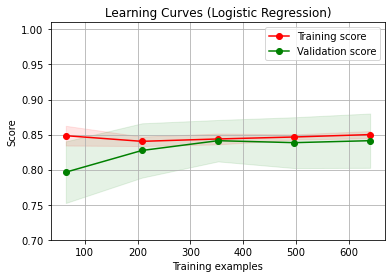

In [80]:
title = "Learning Curves (Logistic Regression)"
cv = 10
plot_learning_curve(logreg, title, X_train_poly_selected, y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=1);

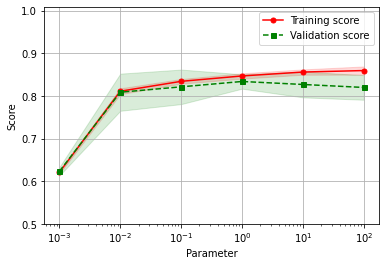

In [81]:
title = "Learning Curves (Logistic Regression)"
param_name = 'C'
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
cv = 10
plot_validation_curve(estimator=logreg, title=title, X=X_train_poly_selected, y=y_train,
                      param_name=param_name, ylim=(0.5, 1.01), param_range=param_range);